<a href="https://colab.research.google.com/github/Kanakavalli2324/BitcoinPricePrediction/blob/main/BitcoinPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mwclient

In [2]:
import mwclient

In [3]:
import time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
site=mwclient.Site("en.wikipedia.org")
page=site.pages["Bitcoin"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
revs=list(page.revisions())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
revs=sorted(revs,key=lambda rev:rev['timestamp'])
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [7]:
from transformers import pipeline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
senti=pipeline('sentiment-analysis')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_t

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [9]:
def find_sentiment(t):
  sent=senti([t[:250]])[0]
  score=sent['score']
  if sent['label']=='NEGATIVE':
    score+=-1
  return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
find_sentiment("I hate you")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.0008870959281921387

In [17]:
edits={}
for i in revs:
  date = time.strftime("%Y-%m-%d",i['timestamp'])
  if date not in edits:
    edits[date]=dict(senti=list(),edit_count=0)
  edits[date]['edit_count']+=1
  comment = i.get("comment", "")
  edits[date]['senti'].append(find_sentiment(comment))
from statistics import mean

for k in edits:
  if len(edits[k]['senti'])>0:
    edits[k]['sentiment']=mean(edits[k]['senti'])
    edits[k]['negsentiment']=len([s for s in edits[k]['senti'] if s<0])/len(edits[k]['senti'])
  else:
    edits[k]['sentiment']=0
    edits[k]['negsetiment']=0
  del edits[k]['senti']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
edits



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'2009-03-08': {'edit_count': 4,
  'sentiment': 0.1745854616165161,
  'negsentiment': 0.75},
 '2009-08-05': {'edit_count': 1,
  'sentiment': 0.7481208443641663,
  'negsentiment': 0.0},
 '2009-08-06': {'edit_count': 2,
  'sentiment': 0.995745837688446,
  'negsentiment': 0.0},
 '2009-08-14': {'edit_count': 1,
  'sentiment': 0.930020809173584,
  'negsentiment': 0.0},
 '2009-10-13': {'edit_count': 2,
  'sentiment': 0.26793554425239563,
  'negsentiment': 0.5},
 '2009-11-18': {'edit_count': 1,
  'sentiment': 0.8839505910873413,
  'negsentiment': 0.0},
 '2009-12-08': {'edit_count': 1,
  'sentiment': -0.013072431087493896,
  'negsentiment': 1.0},
 '2009-12-17': {'edit_count': 1,
  'sentiment': -0.002482891082763672,
  'negsentiment': 1.0},
 '2010-02-23': {'edit_count': 1,
  'sentiment': -0.0005053281784057617,
  'negsentiment': 1.0},
 '2010-03-18': {'edit_count': 1,
  'sentiment': 0.8758773803710938,
  'negsentiment': 0.0},
 '2010-04-13': {'edit_count': 4,
  'sentiment': 0.8443558812141418,
  

In [19]:
import pandas as pd
edits_df=pd.DataFrame.from_dict(edits,orient="index")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,negsentiment
2009-03-08,4,0.174585,0.750000
2009-08-05,1,0.748121,0.000000
2009-08-06,2,0.995746,0.000000
2009-08-14,1,0.930021,0.000000
2009-10-13,2,0.267936,0.500000
...,...,...,...
2024-05-16,1,-0.114030,1.000000
2024-05-21,4,0.235169,0.750000
2024-05-22,9,0.383666,0.555556
2024-05-24,1,-0.001473,1.000000


In [21]:
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# changing the dtype of index values to datetime from string
edits_df.index=pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# taking the continuous range of dates from the data started to till date jus bcoz the edits aren't continuous in wikipedia
dates=pd.date_range(start="2009-03-08",end=datetime.today())
dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09',
               '2024-06-10', '2024-06-11'],
              dtype='datetime64[ns]', length=5575, freq='D')

In [26]:
# making the data continuous to all dates
edits_df=edits_df.reindex(dates,fill_value=0)
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,negsentiment
2009-03-08,4,0.174585,0.75
2009-03-09,0,0.000000,0.00
2009-03-10,0,0.000000,0.00
2009-03-11,0,0.000000,0.00
2009-03-12,0,0.000000,0.00
...,...,...,...
2024-06-07,0,0.000000,0.00
2024-06-08,0,0.000000,0.00
2024-06-09,0,0.000000,0.00
2024-06-10,0,0.000000,0.00


In [27]:
# taking the mean values of the last 30 days of rolling values of the bitcoin
roll_edits=edits_df.rolling(30).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
roll_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,negsentiment
2009-03-08,NaN,NaN,NaN
2009-03-09,NaN,NaN,NaN
2009-03-10,NaN,NaN,NaN
2009-03-11,NaN,NaN,NaN
2009-03-12,NaN,NaN,NaN
...,...,...,...
2024-06-07,0.6,0.032136,0.160185
2024-06-08,0.6,0.032136,0.160185
2024-06-09,0.6,0.032136,0.160185
2024-06-10,0.6,0.032136,0.160185


In [30]:
# removing all the nan values
roll_edits=roll_edits.dropna()
roll_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,negsentiment
2009-04-06,0.133333,0.005820,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-07,0.600000,0.032136,0.160185
2024-06-08,0.600000,0.032136,0.160185
2024-06-09,0.600000,0.032136,0.160185
2024-06-10,0.600000,0.032136,0.160185


In [32]:
# converting to a csv
roll_edits.to_csv("wikipedia_edits.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import yfinance as yf
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# downloading a pricing history of a particular symbol in this case BTC-USD
btc_ticker=yf.Ticker("BTC-USD")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# taking all the history way from the time yf started to record
btc=btc_ticker.history(period='max')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-07 00:00:00+00:00,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.0,0.0
2024-06-08 00:00:00+00:00,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.0,0.0
2024-06-09 00:00:00+00:00,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.0,0.0


In [37]:
btc.index=pd.to_datetime(btc.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# data cleaning
del btc["Dividends"]
del btc["Stock Splits"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# changing every col names to lowercase
btc.columns=[c.lower() for c in btc.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

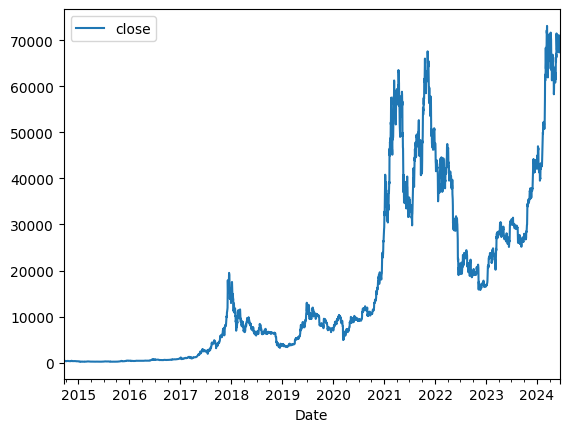

In [40]:
# creating a plotline
btc.plot.line(y="close",use_index=True)

In [41]:
# combining the wikipedia data with btc data
wiki=pd.read_csv("wikipedia_edits.csv",index_col=0,parse_dates=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,negsentiment
2009-04-06,0.133333,0.005820,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-07,0.600000,0.032136,0.160185
2024-06-08,0.600000,0.032136,0.160185
2024-06-09,0.600000,0.032136,0.160185
2024-06-10,0.600000,0.032136,0.160185


In [45]:
btc.index = pd.to_datetime(btc.index)
btc.index = btc.index.tz_localize(None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
btc=btc.merge(wiki,left_index=True,right_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,negsentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718
...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185


In [49]:
# selecting features
# Shifting the next day's closing price to previous day's tomorrow
btc['tomorrow']=btc['close'].shift(-1)
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,negsentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185,69305.773438
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185,69647.992188
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185,69512.281250
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185,67365.695312


In [51]:
# creating target col as int type boolean
btc['target']=(btc['tomorrow']>btc['close']).astype('int')
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,negsentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185,69305.773438,0
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185,69647.992188,1
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185,69512.281250,0
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185,67365.695312,0


In [52]:
btc['target'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
1    1883
0    1673
Name: count, dtype: int64

In [56]:
# training a baseline model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=50,random_state=1)
# except last 200 in train and last 200 in test
train=btc.iloc[:-200]
test=btc[-200:]

predictors=["open","high",	"low"	,"close",	"volume",	"edit_count","sentiment", "negsentiment"]
model.fit(train[predictors],train['target'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=50, random_state=1)

In [59]:
# accuracy of randomforest
from sklearn.metrics import precision_score
pred=model.predict(test[predictors])
pred=pd.Series(pred,index=test.index)
precision_score(test['target'],pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6111111111111112

In [60]:
# backtesting to find the errors
def prediction(train,test,predictors,model):
  model.fit(train[predictors],train['target'])
  pred=model.predict(test[predictors])
  pred=pd.Series(pred,index=test.index,name="predictions")
  combined=pd.concat([test['target'],pred],axis=1)
  return combined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# 1095 takes upto 3yrs of data and step of 150 meaning an interval of 6 months this way taking train and test data not with a particular condi
# possibly we can't use crossvalidation method due to numerical data
def backtesting(data,model,predictors,start=1095,step=150):
  all_pred=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predict=prediction(train,test,predictors,model)
    all_pred.append(predict)
  return pd.concat(all_pred)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# using xgboost to upgrade
from xgboost import XGBClassifier
model=XGBClassifier(random_state=1,learning_rate=.1,n_esitmators=200)
pred_xg=backtesting(btc,model,predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:44:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_esitmators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:44:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_esitmators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:44:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_esitmators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.1

In [68]:
precision_score(pred_xg['target'],pred_xg['predictions'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.4894179894179894

In [73]:
def compute_rolling(btc):
  horizons=[2,7,60,365]
  new_predictors=["close","sentiment","negsentiment"]
  for i in horizons:
    rolling_avg=btc.rolling(i,min_periods=1).mean()
    ratio_col=f"close_ratio{i}"
    btc[ratio_col]=btc['close']/rolling_avg['close']

    edit_col=f"edit_ratio{i}"
    btc[edit_col]=rolling_avg['edit_count']

    rolling=btc.rolling(i,closed="left",min_periods=1).mean()
    trend_col=f"trend_{i}"
    btc[trend_col]=rolling["target"]
    new_predictors+=[ratio_col,trend_col,edit_col]
  return btc,new_predictors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
btc,new_predictors=compute_rolling(btc.copy())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,negsentiment,tomorrow,target,...,trend_2,close_ratio7,edit_ratio7,trend_7,close_ratio60,edit_ratio60,trend_60,close_ratio365,edit_ratio365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185,69305.773438,0,...,0.0,0.998733,0.661905,0.714286,1.056414,0.530000,0.483333,1.591441,1.981735,0.517808
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185,69647.992188,1,...,0.0,0.994930,0.638095,0.571429,1.055809,0.535556,0.483333,1.586324,1.982831,0.517808
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185,69512.281250,0,...,0.5,0.995970,0.614286,0.571429,1.061275,0.541111,0.483333,1.589791,1.984110,0.520548
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185,67365.695312,0,...,0.5,0.992594,0.600000,0.428571,1.059355,0.545556,0.483333,1.582381,1.985297,0.517808


In [76]:
predi=backtesting(btc,model,new_predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_esitmators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_esitmators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_esitmators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.1

In [77]:
precision_score(predi['target'],predi['predictions'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5248169243287225

In [82]:
# preiction of tomorrow value
# last row is the actual tomorrow pred
predi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2017-09-16,0,1
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-06-07,0,1
2024-06-08,1,1
2024-06-09,0,0
2024-06-10,0,0


In [ ]:
# can improve more accordding to the needs